The features subset model with smallest NMAE is : 
 ['runq-sz' 'proc/s' 'cswch/s' 'all_%%usr' 'ldavg-1' 'totsck' 'pgfree/s'
 'plist-sz' 'file-nr']


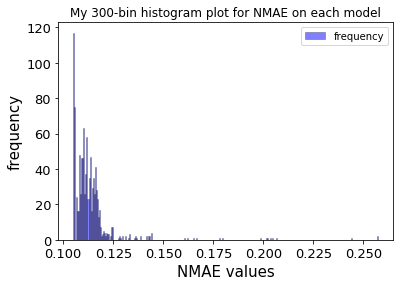

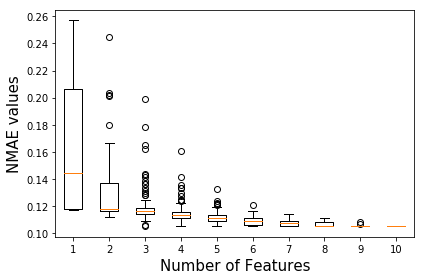

execute time of Method 1 is : 2.2010250091552734  seconds


In [8]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from scipy.special import comb
import time

start = time.time()
feature_cols=['runq-sz','%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr']
Subset_X_train=[]
NMAE_sets =[]


def findsubsets(S):
	results = [] 
	for subset_len in range(1,len(S)+1): 
		for combo in itertools.combinations(S, subset_len): 
			results.append(np.array(combo))
			
	return results

def NMAE_function(train_data):
	linear_model= LinearRegression()
	model=linear_model.fit(X_train[train_data],Y_train)
	Y_pred=linear_model.predict(X_test[train_data])
	# the y_average should be compute based on the y(i) of test set
	Y_avg=np.mean(Y_test.values)
	mae_test=np.sum(np.absolute(Y_pred-Y_test))/len(Y_test)
	NMAE=(mae_test)/Y_avg
	#print ("Normalized Mean Absolute Error(NMAE) for train size: ",size, "is : %.2f" %NMAE, "(",NMAE,")")
	return NMAE

# Read X,Y traces into pandas DataFrames named X,Y

train_data= pd.read_csv('data/X.csv',usecols=feature_cols)
data_Y = pd.read_csv('data/Y.csv')
train_target = data_Y['DispFrames']
#sample devide in Linear Regression
X_train,X_test,Y_train,Y_test= train_test_split(train_data,train_target,test_size=0.3,random_state=1)


#Method 1 Optimal method (small number of features suits)

Subset_X_train =findsubsets(feature_cols)
for x in range(1,1024):
	NMAE_sets.append(NMAE_function(Subset_X_train[x-1]))


end = time.time()
#histogram plot

font_size = 15
plt.title('My 300-bin histogram plot for NMAE on each model')
plt.hist(NMAE_sets, bins = 300, edgecolor = 'k', color ='b', lw = 0.5, alpha = 0.5, label= 'frequency')
plt.xlabel('NMAE values', fontsize=font_size)
plt.ylabel('frequency', fontsize=font_size)
plt.legend(loc=0)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

#finding the smallest NMAE model subset
feature_min= NMAE_sets.index(min(NMAE_sets))
print("The features subset model with smallest NMAE is : \n", Subset_X_train[feature_min])



#box plot for NMAE of models contain 1-10 number of features, in silly way TUT
	
A=NMAE_sets[:9]
B=NMAE_sets[10:54]
C=NMAE_sets[55:174]
D=NMAE_sets[175:384]
E=NMAE_sets[385:636]
F=NMAE_sets[637:846]
G=NMAE_sets[847:966]
H=NMAE_sets[967:1011]
I=NMAE_sets[1012:1021]
J=NMAE_sets[1022]


data_to_plot = [A, B, C, D, E, F, G, H, I, J]

plt.figure("Task4_box")

plt.ylabel('NMAE values', fontsize = font_size)
plt.xlabel('Number of Features', fontsize = font_size)
plt.boxplot(data_to_plot,sym = "o")
plt.tight_layout()
plt.show()


print("execute time of Method 1 is :", (end-start)," seconds")





    features  square_corr
8   plist-sz     0.696309
6     totsck     0.694316
5    ldavg-1     0.664014
0    runq-sz     0.647281
9    file-nr     0.576660
3    cswch/s     0.539877
4  all_%%usr     0.317872
1  %%memused     0.304389
2     proc/s     0.053881
7   pgfree/s     0.052447
execute time of Method 2 is : 0.13640499114990234  seconds


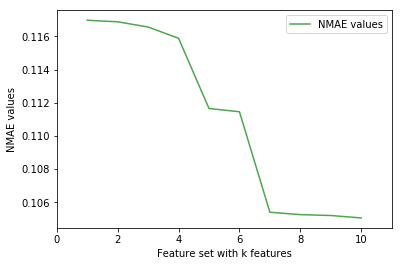

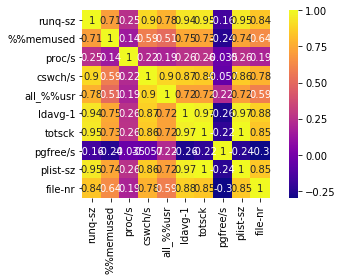

In [9]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest,SelectPercentile
import time

start = time.time()
feature_cols=['runq-sz','%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr']
square_corr=pd.DataFrame(feature_cols,columns=['features'])
NMAE_set =[]

def findcorrcoefsqr(i):
	sample_corr = np.corrcoef(X_train[i],Y_train)
	result= sample_corr[0][1]**2
	return result



def NMAE_function(train_data):
	linear_model= LinearRegression()
	model=linear_model.fit(X_train[train_data],Y_train)
	Y_pred=linear_model.predict(X_test[train_data])
	# the y_average should be compute based on the y(i) of test set
	Y_avg=np.mean(Y_test.values)
	mae_test=np.sum(np.absolute(Y_pred-Y_test))/len(Y_test)
	NMAE=(mae_test)/Y_avg
	#print ("Normalized Mean Absolute Error(NMAE) for train size: ",size, "is : %.2f" %NMAE, "(",NMAE,")")
	return NMAE


# Read X,Y traces into pandas DataFrames named X,Y

train_data= pd.read_csv('data/X.csv',usecols=feature_cols)
data_Y = pd.read_csv('data/Y.csv')
train_target = data_Y['DispFrames']
#sample devide in Linear Regression
X_train,X_test,Y_train,Y_test= train_test_split(train_data,train_target,test_size=0.3,random_state=1)



#Method 2 (Heuristic method)
square_corr['square_corr']=square_corr.features.apply(lambda x : findcorrcoefsqr(x))
rank = square_corr.sort_values(by='square_corr',ascending = False)
print(rank)
for i in range(1,len(feature_cols)+1):
	feature_set = rank.head(i)['features']
	NMAE_set.append(NMAE_function(feature_set))
end = time.time()



#plot the error values with k features
plt.figure("Task4_2_1")
plt.plot(range(1,11),NMAE_set,'g',label="NMAE values",alpha=0.7)
plt.xlabel("Feature set with k features")
plt.xlim(0,11,1)
plt.ylabel("NMAE values")
plt.legend(loc=0)


#heat map
df= pd.concat( [train_data,train_target], axis=1 ).corr()
data_to_plot = pd.DataFrame(df, index=feature_cols, columns=feature_cols)

plt.figure("Task4_2_2")
sns.heatmap(data_to_plot,annot=True, vmax=1, square=True, cmap="plasma")



print("execute time of Method 2 is :", (end-start)," seconds")

plt.tight_layout()
plt.show()

          alpha      NMAE  None_0_features
0      0.100000  0.104719                9
1      0.120679  0.104660                9
2      0.145635  0.104591                9
3      0.175751  0.104516                9
4      0.212095  0.104427                9
5      0.255955  0.104343                9
6      0.308884  0.104297                9
7      0.372759  0.104280                9
8      0.449843  0.104415                9
9      0.542868  0.104857                8
10     0.655129  0.104872                8
11     0.790604  0.104894                7
12     0.954095  0.104944                7
13     1.151395  0.105086                6
14     1.389495  0.105238                6
15     1.676833  0.105465                5
16     2.023590  0.105800                5
17     2.442053  0.106406                5
18     2.947052  0.107341                5
19     3.556480  0.108768                5
20     4.291934  0.109908                4
21     5.179475  0.109899                4
22     6.25

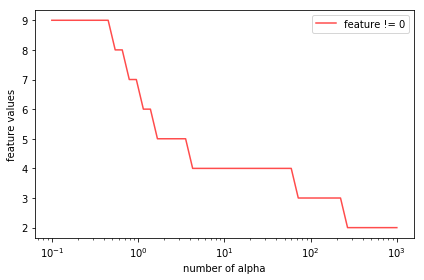

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest,SelectPercentile
import time


def NMAE_function(i):
	linear_model= Lasso(alpha = i)
	model=linear_model.fit(X_train,Y_train)
	Y_pred=linear_model.predict(X_test)
	# the y_average should be compute based on the y(i) of test set
	Y_avg=np.mean(Y_test.values)
	mae_test=np.sum(np.absolute(Y_pred-Y_test))/len(Y_test)
	NMAE=(mae_test)/Y_avg
	x= np.sum(model.coef_ != 0)

	return NMAE,x


start = time.time()
feature_cols=['runq-sz','%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr']
# Read X,Y traces into pandas DataFrames named X,Y

train_data= pd.read_csv('data/X.csv',usecols=feature_cols)
data_Y = pd.read_csv('data/Y.csv')
train_target = data_Y['DispFrames']
#sample devide in Linear Regression
X_train,X_test,Y_train,Y_test= train_test_split(train_data,train_target,test_size=0.3,random_state=1)


alphas=10**np.linspace(-1,3)
Lasso_set=pd.DataFrame(alphas,columns=['alpha'])
Lasso_set['NMAE']=Lasso_set.alpha.apply(lambda x : NMAE_function(x)[0])
Lasso_set['None_0_features']=Lasso_set.alpha.apply(lambda x : NMAE_function(x)[1])
print(Lasso_set)
end = time.time()


plt.figure("Task4_3")
plt.plot(alphas,Lasso_set['None_0_features'],'r',label="feature != 0",alpha=0.7)
plt.xlabel("number of alpha")
plt.xscale('log')
plt.ylabel("feature values")
plt.legend(loc=0)


print("execute time of Method 3 is :", (end-start)," seconds")
plt.tight_layout()
plt.show()